### 3.2 Data Collection (0.5 point) 

In [1]:
#importing required libraries and packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
import wordcloud
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import concurrent.futures
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from sklearn.metrics import make_scorer, accuracy_score, classification_report

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Checkout\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Checkout\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Checkout\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Checkout\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Checkout\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
#loading the data
df = pd.read_csv('Electronics30.csv')
df

,rating,verified,reviewerID,asin,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake,unixReviewTime
0,5.0,True,A1N82P7TEJT4CU,B000001ON6,3/15/16,kelly monroe goode,Brand new still package,Five Stars,Genuine,1458000000
1,3.0,True,ASBAJCQHPVBFA,B000001ON6,3/15/16,Roger Roles,Thanks replacing quickly tried today couldnt l...,Thanks for replacing it so quickly I just trie...,Genuine,1458000000
2,1.0,True,A2VANT6O13NZ91,B000001ON6,3/14/16,dwreck,liquid cleaning bottle,One Star,Genuine,1457913600
3,5.0,True,A30WHZQLI2IZ7M,B000001ON6,3/13/16,michael schield,burned house fire,Five Stars,Genuine,1457827200
4,2.0,True,A2T0MN83BGCMC0,B000001ON6,3/11/16,J. Ames,cant make current version making number year a...,Product decline.,Genuine,1457654400
...,...,...,...,...,...,...,...,...,...,...
29995,NaN,NaN,ACZ2F796AIKK3,B000023VW2,NaN,NaN,NaN,NaN,NaN,1369872000
29996,NaN,NaN,A1O1VQQHOQ7U2E,B000023VW2,NaN,NaN,NaN,NaN,NaN,1369094400
29997,NaN,NaN,A4ECXYLWC4AH3,B000023VW2,NaN,NaN,NaN,NaN,NaN,1368921600
29998,NaN,NaN,A3MPNXY6UKZK4O,B000023VW2,NaN,NaN,NaN,NaN,NaN,1367971200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rating           29991 non-null  float64
 1   verified         29991 non-null  object 
 2   reviewerID       30000 non-null  object 
 3   asin             30000 non-null  object 
 4   reviewTime       29991 non-null  object 
 5   reviewerName     29991 non-null  object 
 6   reviewText       29561 non-null  object 
 7   summary          29991 non-null  object 
 8   Genuine_or_Fake  29991 non-null  object 
 9   unixReviewTime   30000 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 2.3+ MB


### 3.3 Data Pre-processing (0.5 point) 

In [4]:
#dropping unecessary columns
df.drop('reviewerID',inplace=True,axis=1)
df.drop('asin',inplace=True,axis=1)
df.drop('unixReviewTime',inplace=True,axis=1)

df

,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake
0,5.0,True,3/15/16,kelly monroe goode,Brand new still package,Five Stars,Genuine
1,3.0,True,3/15/16,Roger Roles,Thanks replacing quickly tried today couldnt l...,Thanks for replacing it so quickly I just trie...,Genuine
2,1.0,True,3/14/16,dwreck,liquid cleaning bottle,One Star,Genuine
3,5.0,True,3/13/16,michael schield,burned house fire,Five Stars,Genuine
4,2.0,True,3/11/16,J. Ames,cant make current version making number year a...,Product decline.,Genuine
...,...,...,...,...,...,...,...
29995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29998,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#checking Null Values
df.isnull().sum()

rating               9
verified             9
reviewTime           9
reviewerName         9
reviewText         439
summary              9
Genuine_or_Fake      9
dtype: int64

In [6]:
# Clean the DataFrame
# Drop rows with missing values
df_cleaned = df.dropna()  


print("\nCleaned DataFrame:")
df_cleaned



Cleaned DataFrame:


,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake
0,5.0,True,3/15/16,kelly monroe goode,Brand new still package,Five Stars,Genuine
1,3.0,True,3/15/16,Roger Roles,Thanks replacing quickly tried today couldnt l...,Thanks for replacing it so quickly I just trie...,Genuine
2,1.0,True,3/14/16,dwreck,liquid cleaning bottle,One Star,Genuine
3,5.0,True,3/13/16,michael schield,burned house fire,Five Stars,Genuine
4,2.0,True,3/11/16,J. Ames,cant make current version making number year a...,Product decline.,Genuine
...,...,...,...,...,...,...,...
29986,3.0,True,5/30/13,nhc,think antenna make improvement reception time ...,used with ETON G6 Shortwave radio,Genuine
29987,5.0,True,5/21/13,Pawan Kumar,live closed apartment put sangean ANT60 short ...,Wow Product for its use,Genuine
29988,3.0,True,5/19/13,HWW,Im getting improvement nothing major probably ...,Antenna,Genuine
29989,5.0,True,5/8/13,Kindle,Great love storage rollup system though bulky ...,It's a great antenna,Genuine


In [7]:
# Cleanning the DataFrame
df_cleaned['reviewTime'] = pd.to_datetime(df['reviewTime'])  # Convert 'reviewTime' to datetime
df_cleaned.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake
0,5.0,True,2016-03-15,kelly monroe goode,Brand new still package,Five Stars,Genuine
1,3.0,True,2016-03-15,Roger Roles,Thanks replacing quickly tried today couldnt l...,Thanks for replacing it so quickly I just trie...,Genuine
2,1.0,True,2016-03-14,dwreck,liquid cleaning bottle,One Star,Genuine
3,5.0,True,2016-03-13,michael schield,burned house fire,Five Stars,Genuine
4,2.0,True,2016-03-11,J. Ames,cant make current version making number year a...,Product decline.,Genuine


In [8]:
#checking
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29561 entries, 0 to 29990
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   rating           29561 non-null  float64       
 1   verified         29561 non-null  object        
 2   reviewTime       29561 non-null  datetime64[ns]
 3   reviewerName     29561 non-null  object        
 4   reviewText       29561 non-null  object        
 5   summary          29561 non-null  object        
 6   Genuine_or_Fake  29561 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.8+ MB


### 3.4 Data Transformation (0.5 point) 

In [9]:
## Frequency Words
words = Counter(' '.join(df_cleaned['reviewText'].to_list()).split())
Frequency_words = pd.DataFrame([words]).transpose().reset_index().rename(columns = {'index': 'Words', 0:'Frequency' })
Frequency_words = Frequency_words.sort_values('Frequency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'Rank'})
Frequency_words['Rank'] = Frequency_words['Rank'].apply(lambda x : x+1)
Frequency_words.head(20)

,Rank,Words,Frequency
0,1,price,5328
1,2,would,5130
2,3,product,5024
3,4,time,4903
4,5,well,4758
5,6,ear,4664
6,7,radio,4300
7,8,year,4076
8,9,dont,3979
9,10,Ive,3752


In [10]:
#removing punctuation and stopwords
def text_process(reviewText):
    nopunc = [char for char in reviewText if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])


In [11]:
# Display the original text
original_text = df['reviewText'][0]
print("Original Text:")
print(original_text)

# Clean the text using the clean_text function
cleaned_text = text_process(original_text)
print("\nCleaned Text:")
cleaned_text

Original Text:
Brand new still package

Cleaned Text:


'Brand new still package'

In [12]:
# Assuming 'reviewText' is the correct column name
df_cleaned['reviewText'] = df_cleaned['reviewText'].apply(text_process)

In [13]:
#converting to string
df_cleaned['reviewText'] = df_cleaned['reviewText'].astype(str)

In [14]:
#lemmatizing the reviewText Column
lemmatizer = WordNetLemmatizer()
def lemmatize_words(reviewText):
    return ' '.join([lemmatizer.lemmatize(word) for word in reviewText.split()])
df_cleaned["reviewText"] = df_cleaned["reviewText"].apply(lambda reviewText: lemmatize_words(reviewText))

In [15]:
#printing top 5 rows
df_cleaned['reviewText'].head()

0                              Brand new still package
1    Thanks replacing quickly tried today couldnt l...
2                               liquid cleaning bottle
3                                    burned house fire
4    cant make current version making number year a...
Name: reviewText, dtype: object

In [16]:
# Split the concatenated text into words and count occurrences
rare_words = pd.Series(' '.join(df_cleaned['reviewText']).split()).value_counts()[-10:]
#printing
print("\nRARE WORDS:")
print(rare_words)


RARE WORDS:
commericial                                                                             1
MBps                                                                                    1
RJ45MRJ45Manbspthat                                                                     1
CAT6                                                                                    1
href50FTCAT6BlackPatchCableSnaglessRJ45MRJ45MdpB000CNBQASrefcmcrarpdrvwtxtieUTF850FT    1
R45                                                                                     1
superstores                                                                             1
qite                                                                                    1
glorify                                                                                 1
badjust                                                                                 1
dtype: int64


In [17]:
# Removing the common words
common = pd.Series(' '.join(df_cleaned['reviewText']).split()).value_counts()[:10]
common = list(common.index)
df_cleaned['reviewText'] = df_cleaned['reviewText'].apply(lambda i: " ".join(i for i in i.split() if i not in common))

# Removing the rare words
rare = pd.Series(' '.join(df_cleaned['reviewText']).split()).value_counts()[-10:]
rare = list(rare.index)
df_cleaned['reviewText'] = df_cleaned['reviewText'].apply(lambda i: " ".join(i for i in i.split() if i not in rare))
df_cleaned['reviewText'][0]

'Brand new still package'

In [18]:
common

['price',
 'would',
 'product',
 'time',
 'well',
 'ear',
 'radio',
 'year',
 'dont',
 'Ive']

In [19]:
# Tokenizing words in the 'review_text' column using NLTK's word_tokenize
tokenized_reviews = df_cleaned['reviewText'].apply(word_tokenize)
tokenized_reviews.head()

0                         [Brand, new, still, package]
1    [Thanks, replacing, quickly, tried, today, cou...
2                           [liquid, cleaning, bottle]
3                                [burned, house, fire]
4    [cant, make, current, version, making, number,...
Name: reviewText, dtype: object

In [20]:
#printing top 5 rows
df_cleaned.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake
0,5.0,True,2016-03-15,kelly monroe goode,Brand new still package,Five Stars,Genuine
1,3.0,True,2016-03-15,Roger Roles,Thanks replacing quickly tried today couldnt l...,Thanks for replacing it so quickly I just trie...,Genuine
2,1.0,True,2016-03-14,dwreck,liquid cleaning bottle,One Star,Genuine
3,5.0,True,2016-03-13,michael schield,burned house fire,Five Stars,Genuine
4,2.0,True,2016-03-11,J. Ames,cant make current version making number ago ta...,Product decline.,Genuine


In [21]:
# Applying sentiment analysis to review text
sia = SentimentIntensityAnalyzer()
df_cleaned['sentiment_score'] = df_cleaned['reviewText'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Calculating the number of reviews per reviewer
reviewer_counts = df_cleaned['reviewerName'].value_counts()
df_cleaned['unusual_reviewer'] = df_cleaned['reviewerName'].apply(lambda x: reviewer_counts[x] if x in reviewer_counts else 0)

# Calculating the length of each review
df_cleaned['review_length'] = df_cleaned['reviewText'].apply(len)

# Defining a list of suspicious words
suspicious_words = ['fake', 'scam', 'fraud']
df_cleaned['suspicious_words'] = df_cleaned['reviewText'].apply(lambda x: any(word in x.lower() for word in suspicious_words))

df_cleaned.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake,sentiment_score,unusual_reviewer,review_length,suspicious_words
0,5.0,True,2016-03-15,kelly monroe goode,Brand new still package,Five Stars,Genuine,0.0000,1,23,False
1,3.0,True,2016-03-15,Roger Roles,Thanks replacing quickly tried today couldnt l...,Thanks for replacing it so quickly I just trie...,Genuine,0.4404,1,59,False
2,1.0,True,2016-03-14,dwreck,liquid cleaning bottle,One Star,Genuine,0.0000,1,22,False
3,5.0,True,2016-03-13,michael schield,burned house fire,Five Stars,Genuine,-0.3400,1,17,False
4,2.0,True,2016-03-11,J. Ames,cant make current version making number ago ta...,Product decline.,Genuine,0.4456,1,202,False


In [22]:
# Filtering and displaying the rows where the 'verified' column is False
false_verified_rows = df_cleaned[df_cleaned['verified'] == False]
false_verified_rows.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake,sentiment_score,unusual_reviewer,review_length,suspicious_words
18,5.0,False,2009-02-12,Zapple73,bought brand tape make DBX II recording pc nee...,Nothing Better Than Maxell,Genuine,0.0000,1,61,False
19,1.0,False,2008-06-27,Floyd L. Smith,consistently poor experience Maxell XLii 90 Hi...,"Fine tape, poor mechanism",Genuine,-0.9337,1,627,False
20,5.0,False,2008-06-26,William J. Driscoll Jr.,3 per tape including shipping charge 5pack per...,Best tape,Genuine,0.6705,1,458,False
22,4.0,False,2008-04-30,Matthew G. Sherwin,Maxell manufacture excellent Xlii high bias 90...,fine high bias 90 minute cassette tape--with j...,Fake,0.9917,4,1680,False
23,5.0,False,2007-12-23,DJ.L,Im noticing day age cd format mp3 downloading ...,The Best For The Job.,Genuine,0.9274,1,394,False


In [23]:
# Counting the occurrences of each unique value in the 'Genuine_or_Fake' column for the filtered rows
predicted_stats = df_cleaned[df_cleaned['verified'] == False]['Genuine_or_Fake'].value_counts()
print(predicted_stats)

Genuine    6487
Fake        814
Name: Genuine_or_Fake, dtype: int64


In [24]:
#displaying the top 5 rows
df_cleaned.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake,sentiment_score,unusual_reviewer,review_length,suspicious_words
0,5.0,True,2016-03-15,kelly monroe goode,Brand new still package,Five Stars,Genuine,0.0000,1,23,False
1,3.0,True,2016-03-15,Roger Roles,Thanks replacing quickly tried today couldnt l...,Thanks for replacing it so quickly I just trie...,Genuine,0.4404,1,59,False
2,1.0,True,2016-03-14,dwreck,liquid cleaning bottle,One Star,Genuine,0.0000,1,22,False
3,5.0,True,2016-03-13,michael schield,burned house fire,Five Stars,Genuine,-0.3400,1,17,False
4,2.0,True,2016-03-11,J. Ames,cant make current version making number ago ta...,Product decline.,Genuine,0.4456,1,202,False


### 3.5 Data Preparation (0.5 point) 

In [25]:
# Splitting the DataFrame into training and temporary sets
train_df, temp_df = train_test_split(df_cleaned, test_size=0.3, random_state=42)

# Splitting the temporary set into validation and test sets
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Display the shapes of the resulting sets
print("Training Set Shape:", train_df.shape)
print("Validation Set Shape:", val_df.shape)
print("Testing Set Shape:", test_df.shape)

Training Set Shape: (20692, 11)
Validation Set Shape: (4434, 11)
Testing Set Shape: (4435, 11)


In [26]:
# Getting the shape of the training DataFrame
train_shape = train_df.shape
train_shape

(20692, 11)

In [27]:
#displaying top 5 rows
train_df.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake,sentiment_score,unusual_reviewer,review_length,suspicious_words
24716,5.0,False,2010-06-24,Steve,must say thoroughly impressed clarity Koss Por...,Coming from Shure E2C's...,Fake,0.9725,34,815,False
10324,3.0,False,2000-02-20,Oscar Melendez,WEll got CD player yesterday cheap seethroughc...,A Lovable CD Player,Genuine,0.7717,1,165,False
7136,5.0,True,2016-11-14,Lena I,Recently bad fall Bicycle surgery knee Rehabil...,Great solution for my problem,Genuine,0.4404,1,149,False
18546,4.0,False,2002-09-28,WKRP,SOUND better many portable bit bassy correspon...,"Good for the money, but get full-size for full...",Genuine,0.7998,1,665,False
12254,4.0,True,2011-06-13,Amy Morreale,reason didnt give 5 start Im problem finding p...,"Great bag - stores plenty, easy to empty",Genuine,-0.7906,1,189,False


In [28]:
# Get the shape of the Validation DataFrame
val_shape = val_df.shape
val_shape

(4434, 11)

In [29]:
#displaying
val_df.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake,sentiment_score,unusual_reviewer,review_length,suspicious_words
14833,5.0,True,2014-11-23,OB-1,needed buy agine,OB-1,Genuine,0.0000,1,16,False
3200,5.0,True,2015-03-09,Ralph LaBrosse,Love Highly recommend,Five Stars,Genuine,0.7902,1,21,False
29287,5.0,False,2009-02-24,Zoestar,POLAROID instant film RIP missed,Polaroid,Genuine,-0.2960,1,32,False
21156,5.0,False,2000-03-15,Ronald Benjamin,One thing post mention forgot fact auto wind T...,Winder,Genuine,0.6808,1,131,False
25942,5.0,True,2015-12-02,smunier,received pair sennheiser HD280 pro gift ago so...,A classic,Genuine,0.7358,1,338,False


In [30]:
#Getting the shape of the test DataFrame
test_shape = test_df.shape
test_shape

(4435, 11)

In [31]:
#displaying the top 5 rows
test_df.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake,sentiment_score,unusual_reviewer,review_length,suspicious_words
2951,4.0,True,2017-02-11,hank80920,shower head pretty quite bit pressure even usi...,This shower head works pretty good. It has qui...,Genuine,0.5750,1,179,False
17249,5.0,False,2008-10-18,Stephen Wayland,Bought lock college far worked perfectly steel...,"Very sturdy, works well.",Genuine,0.7579,1,165,False
25735,5.0,True,2016-03-22,Adrian,using three month extremely satisfied used man...,... headphones for over three months and is ex...,Genuine,0.9391,4,126,False
7858,5.0,True,2012-12-23,Anne Marie,Cassettes still way recordthey plan buying,good find,Genuine,0.0000,2,42,False
18175,4.0,True,2015-11-02,Inasilentway,Potentially five star especially reason four q...,Complex but worth it.,Genuine,0.9085,1,877,False


### 3.6 Data Statistics (0.5 point) 

### Graph before cleaning raw dataset

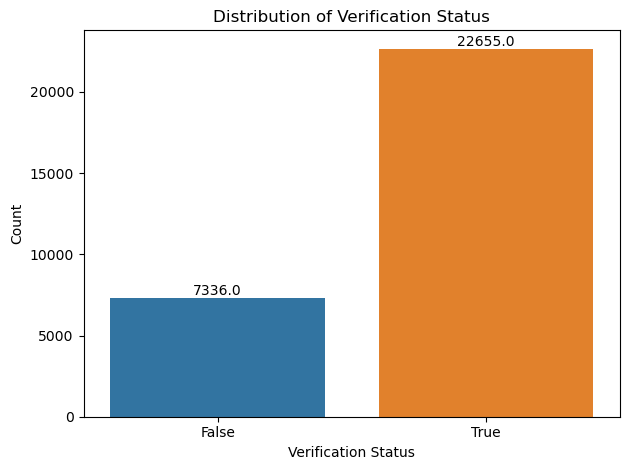

In [32]:
# Creating the countplot
ax = sns.countplot(x='verified', data=df)

# Adding count values on top of each bar with some spacing
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Setting plot title and labels
plt.title('Distribution of Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')

# Adjusting layout to avoid clipping of text
plt.tight_layout()

# Showing the plot
plt.show()

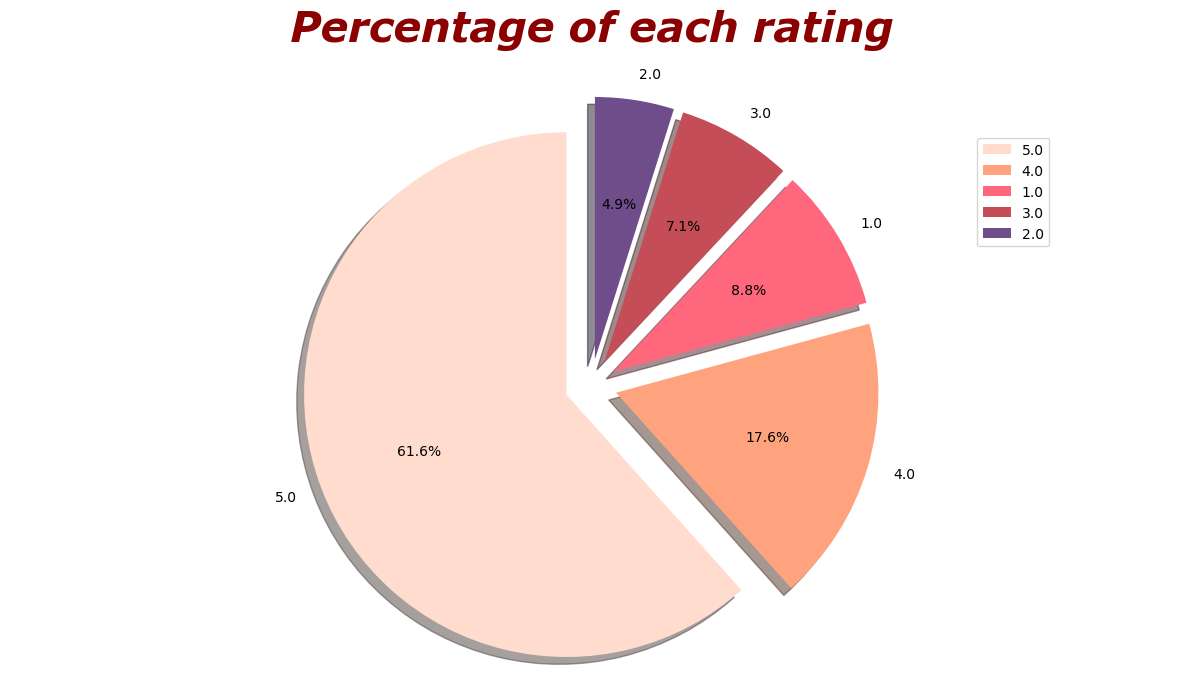

In [33]:
plt.figure(figsize=(15, 8))

# Assuming 'rating' is the column you want to analyze
rating_counts = df['rating'].value_counts()

# Defining colors and explode
colors = ['#FFDCCE', '#FFA37E', '#FF677D', '#C44D58', '#6F4D8B']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # Modified explode values for each portion

plt.pie(rating_counts, explode=explode, labels=rating_counts.index, colors=colors,
        autopct='%1.1f%%', startangle=90, shadow=True)

# Setting custom font for the title
title_font = font_manager.FontProperties(family='Verdana', style='italic', weight='bold', size=30)
plt.title('Percentage of each rating', fontproperties=title_font, pad=20, color='darkred')  # Adjusted color and appearance
plt.ylabel('')  # Remove the y-axis label

# Adding legend
plt.legend(rating_counts.index, loc="best", bbox_to_anchor=(0.9, 0.9))

plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

### Graph after cleaning raw dataset

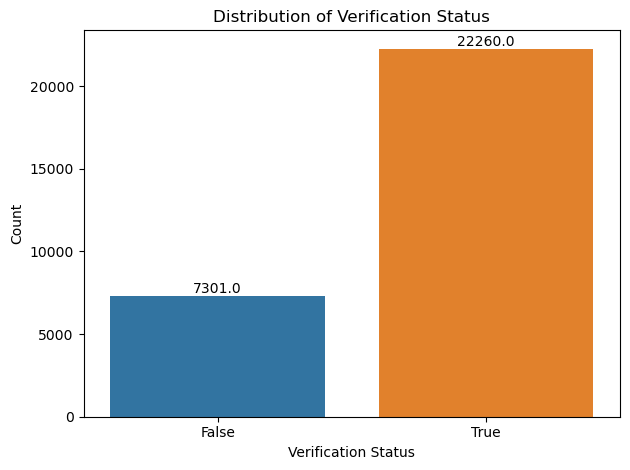

In [34]:
# Creating the countplot
ax = sns.countplot(x='verified', data=df_cleaned)

# Adding count values on top of each bar with some spacing
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Setting plot title and labels
plt.title('Distribution of Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')

# Adjusting layout to avoid clipping of text
plt.tight_layout()

# Showing the plot
plt.show()

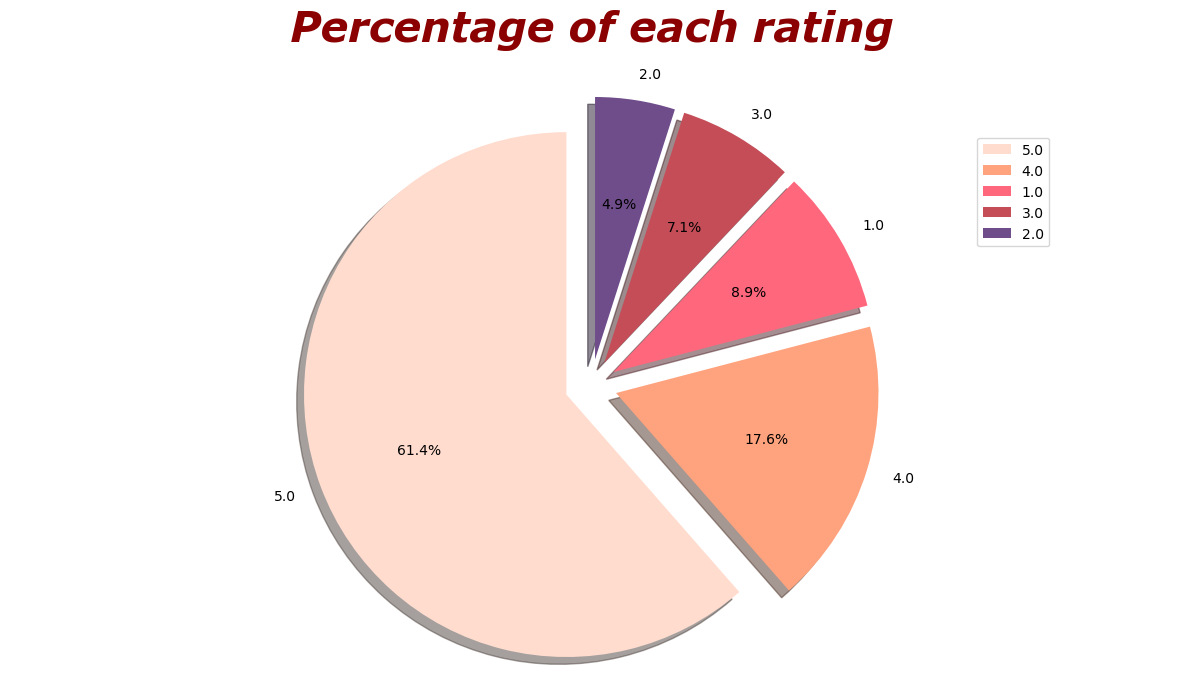

In [35]:
plt.figure(figsize=(15, 8))

# Assuming 'rating' is the column you want to analyze
rating_counts = df_cleaned['rating'].value_counts()

# Defining colors and explode
colors = ['#FFDCCE', '#FFA37E', '#FF677D', '#C44D58', '#6F4D8B']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # Modified explode values for each portion

plt.pie(rating_counts, explode=explode, labels=rating_counts.index, colors=colors,
        autopct='%1.1f%%', startangle=90, shadow=True)

# Setting custom font for the title
title_font = font_manager.FontProperties(family='Verdana', style='italic', weight='bold', size=30)
plt.title('Percentage of each rating', fontproperties=title_font, pad=20, color='darkred')  # Adjusted color and appearance
plt.ylabel('')  # Remove the y-axis label

# Adding legend
plt.legend(rating_counts.index, loc="best", bbox_to_anchor=(0.9, 0.9))

plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

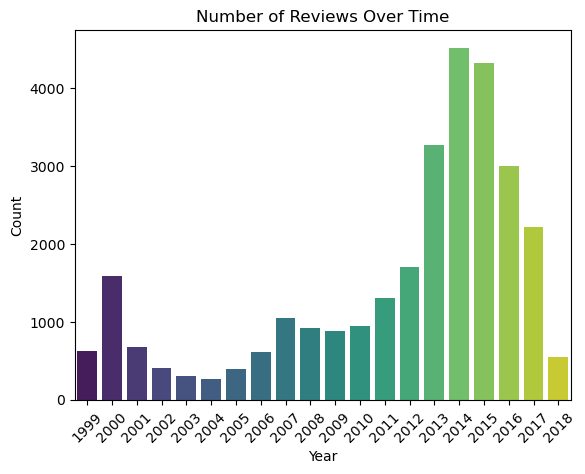

In [36]:
# Converting the 'reviewTime' column to datetime format
df_cleaned['reviewTime'] = pd.to_datetime(df['reviewTime'])
# Creating a new 'Year' column by extracting the year from 'reviewTime'
df_cleaned['Year'] = df_cleaned['reviewTime'].dt.to_period('Y')

# Sort the DataFrame based on the 'Year' column
df_sorted = df_cleaned.sort_values(by='Year')

# Create the count plot
sns.countplot(x='Year', data=df_sorted, palette='viridis')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


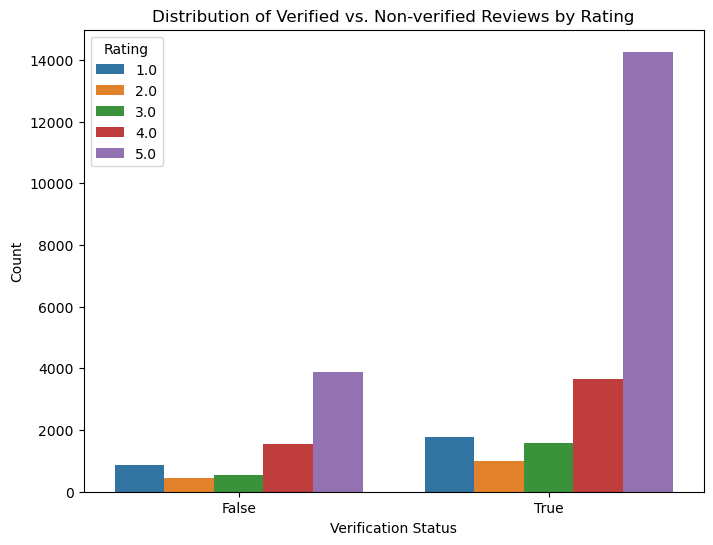

In [37]:
#plotting a bar graph
plt.figure(figsize=(8, 6))
sns.countplot(x='verified', data=df_cleaned, hue='rating')
plt.title('Distribution of Verified vs. Non-verified Reviews by Rating')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.legend(title='Rating')
plt.show()

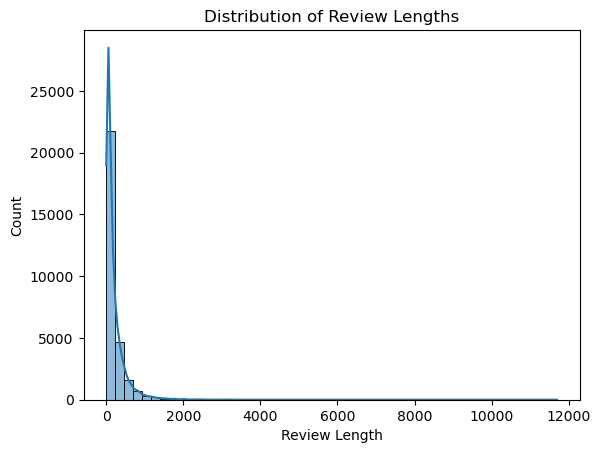

In [38]:
#plotting a histogram for Distribution of Review Lengths
df_cleaned['review_length'] = df_cleaned['reviewText'].apply(len)

# Creating a histogram of the review lengths using seaborn
sns.histplot(df_cleaned['review_length'], bins=50, kde=True)

# Setting plot title and axis labels
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

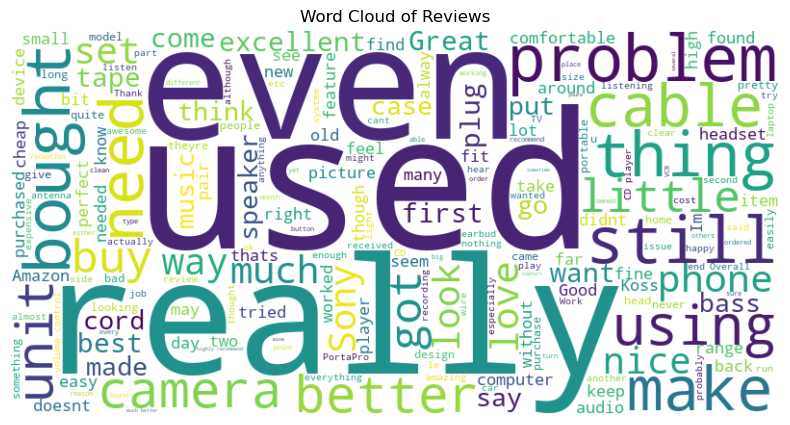

In [39]:
# Generating a WordCloud using the 'reviewText' column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_cleaned['reviewText']))

# Setting up the figure size
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')

#showing
plt.show()

### Graph after transformation

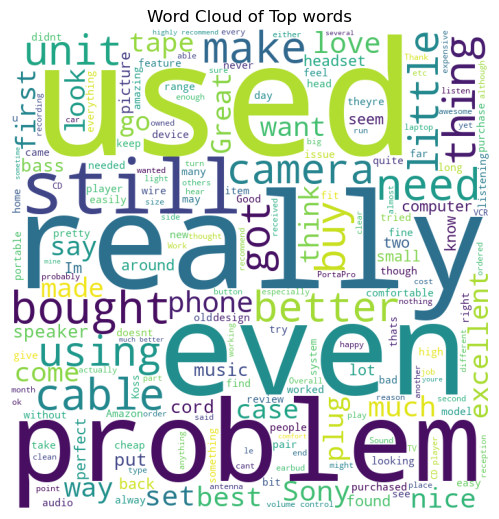

In [40]:
# Checking and display top common words using WordCloud
words = '' 
for i in df_cleaned["reviewText"]: 
    tokens = i.split()   
    words += " ".join(tokens)+" "

word_cloud = WordCloud(width=700, height=700, 
                       background_color='white', 
                       min_font_size=10).generate(words) 

# Setting up the figure size
plt.figure(figsize=(5, 5)) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.title('Word Cloud of Top words')
plt.tight_layout(pad=0) 
#showing
plt.show()

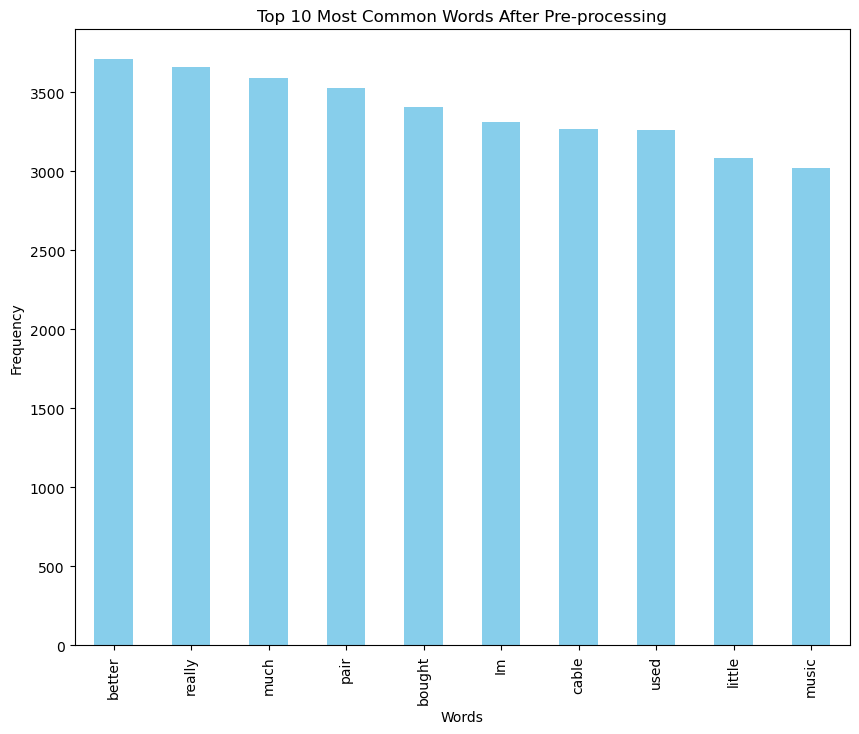

In [41]:
# Creating a Series with the counts of the top 10 words
top_words = pd.Series(' '.join(df_cleaned['reviewText']).split()).value_counts()[:10]
# Setting up the figure size
plt.figure(figsize=(10, 8))
top_words.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Words After Pre-processing')
plt.xlabel('Words')
plt.ylabel('Frequency')
#showing
plt.show()

### Graph with Training,Testing and validation dataset 


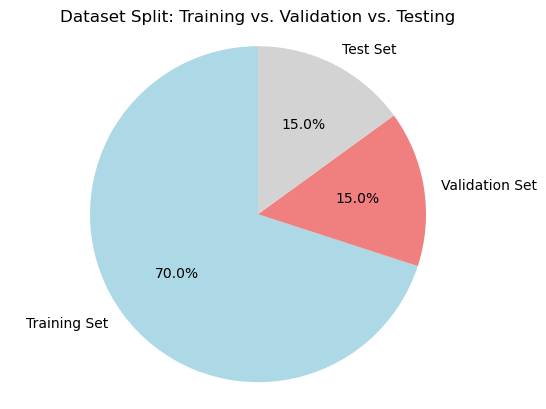

In [42]:
train_set_length = 70
val_set_length = 15
test_set_length = 15

# Data for the graph
labels = ['Training Set', 'Validation Set', 'Test Set']
sizes = [train_set_length, val_set_length,test_set_length]
colors = ['lightblue', 'lightcoral','lightgrey' ]

# Plotting the graph
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Dataset Split: Training vs. Validation vs. Testing')
plt.show()

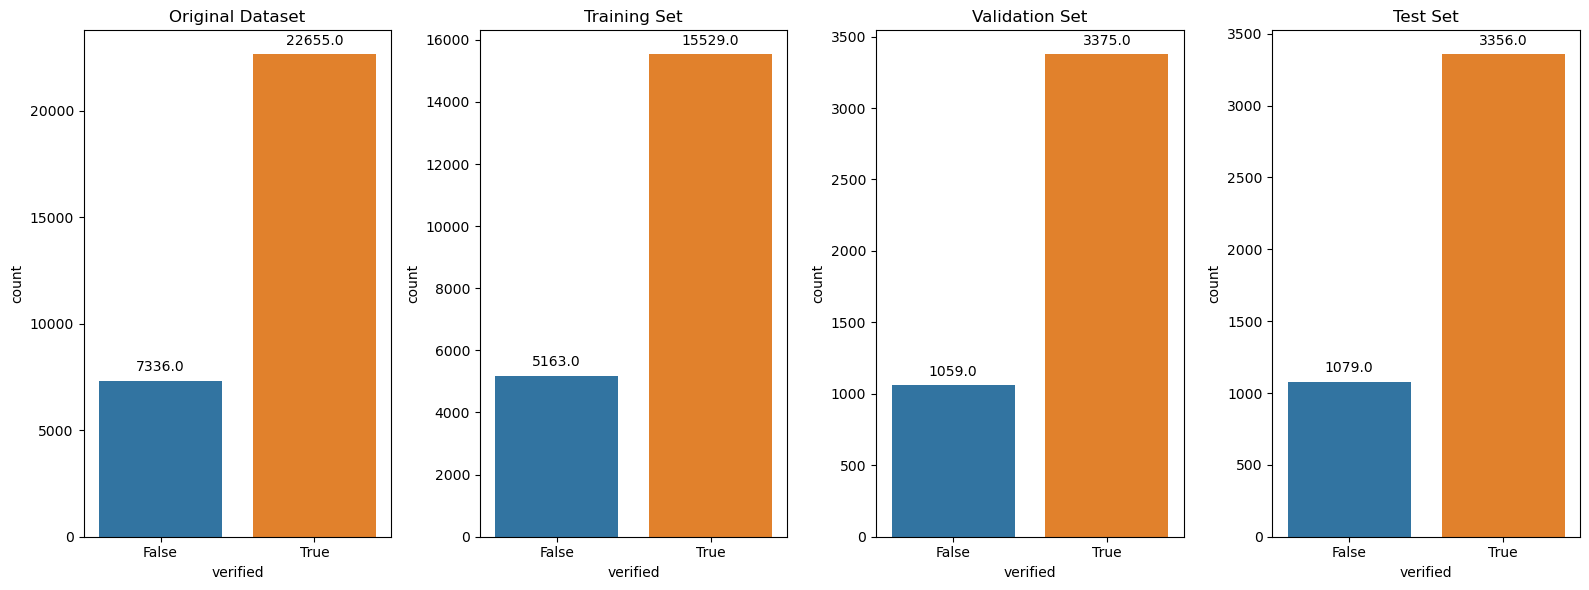

In [43]:
# Plotting the subplots
plt.figure(figsize=(16, 6))

# Original Dataset
plt.subplot(1, 4, 1)
ax = sns.countplot(x='verified', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Original Dataset')

# Training Set
plt.subplot(1, 4, 2)
ax = sns.countplot(x='verified', data=train_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Training Set')

# Validation Set
plt.subplot(1, 4, 3)
ax = sns.countplot(x='verified', data=val_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Validation Set')

# Test Set
plt.subplot(1, 4, 4)
ax = sns.countplot(x='verified', data=test_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Test Set')

plt.tight_layout()
plt.show()

## MODELS

In [44]:
# Splitting the training data into features (X_train) and labels (y_train)
X_train = train_df[['sentiment_score', 'unusual_reviewer', 'review_length', 'suspicious_words']]
y_train = train_df['Genuine_or_Fake']

# Splitting the validation data into features (X_val) and labels (y_val)
X_val = val_df[['sentiment_score', 'unusual_reviewer', 'review_length', 'suspicious_words']]
y_val = val_df['Genuine_or_Fake']

# Splitting the testing data into features (X_test) and labels (y_test)
X_test = test_df[['sentiment_score', 'unusual_reviewer', 'review_length', 'suspicious_words']]
y_test = test_df['Genuine_or_Fake']

## Naive Bayes 

#### Without Hyperparameter tuning

In [45]:
# Initializing the Naive Bayes model
nb_model = GaussianNB()

# Training the model on the training data
nb_model.fit(X_train, y_train)

# Predicting labels for the validation set
y_val_pred = nb_model.predict(X_val)

# Evaluating the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
classification_report_val = classification_report(y_val, y_val_pred)

# Printing the evaluation metrics for the validation set
print("Naive Bayes Validation Accuracy:", accuracy_val)
print("Naive Bayes Classification Report for Validation Set:")
print(classification_report_val)

# Predicting labels for the test set
y_test_pred = nb_model.predict(X_test)

# Evaluating the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

# Printing the evaluation metrics for the test set
print("Naive Bayes Test Accuracy:", accuracy_test)
print("Naive Bayes Classification Report for Test Set:")
print(classification_report_test)

Naive Bayes Validation Accuracy: 0.9634641407307172
Naive Bayes Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.35      0.56      0.43       110
     Genuine       0.99      0.97      0.98      4324

    accuracy                           0.96      4434
   macro avg       0.67      0.77      0.71      4434
weighted avg       0.97      0.96      0.97      4434

Naive Bayes Test Accuracy: 0.97271702367531
Naive Bayes Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.53      0.71      0.60       130
     Genuine       0.99      0.98      0.99      4305

    accuracy                           0.97      4435
   macro avg       0.76      0.84      0.79      4435
weighted avg       0.98      0.97      0.97      4435



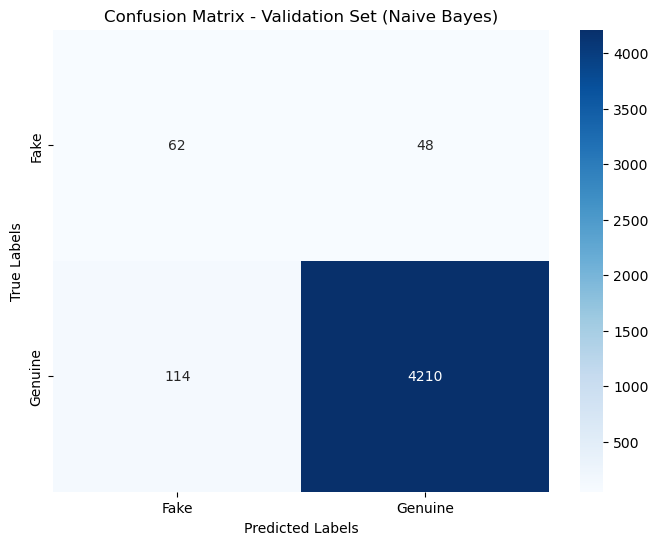

In [46]:
# Predicting labels for the validation set using Decision Tree
y_val_pred_dt = nb_model.predict(X_val)

# Computing the confusion matrix for the validation set
conf_matrix_val_dt = confusion_matrix(y_val, y_val_pred_dt)

# Plotting the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Genuine'], yticklabels=['Fake', 'Genuine'])
plt.title('Confusion Matrix - Validation Set (Naive Bayes)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### With Hyperparameter tuning

In [47]:
# Defining the hyperparameter grid for Gaussian Naive Bayes
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Creating the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Performing grid search with cross-validation
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring=make_scorer(accuracy_score))
grid_search_nb.fit(X_train, y_train)

# Getting the best hyperparameters
best_params_nb = grid_search_nb.best_params_

# Initializing the Gaussian Naive Bayes model with the best hyperparameters
best_nb_model = GaussianNB(var_smoothing=best_params_nb['var_smoothing'])

# Training the model on the training data
best_nb_model.fit(X_train, y_train)

# Predicting labels for the validation set
y_val_pred_nb_tuned = best_nb_model.predict(X_val)

# Evaluating the model on the validation set
accuracy_val_nb_tuned = accuracy_score(y_val, y_val_pred_nb_tuned)
classification_report_val_nb_tuned = classification_report(y_val, y_val_pred_nb_tuned)

# Printing the evaluation metrics
print("Best Hyperparameters for Naive Bayes:", best_params_nb)
print(" Naive Bayes Validation Accuracy with Tuned Hyperparameters:", accuracy_val_nb_tuned)
print(" Naive Bayes Classification Report for Validation Set:")
print(classification_report_val_nb_tuned)

# Predicting labels for the test set
y_test_pred_nb_tuned = best_nb_model.predict(X_test)

# Evaluating the model on the test set
accuracy_test_nb_tuned = accuracy_score(y_test, y_test_pred_nb_tuned)
classification_report_test_nb_tuned = classification_report(y_test, y_test_pred_nb_tuned)

# Printing the evaluation metrics for the test set
print(" Naive Bayes Test Accuracy with Tuned Hyperparameters:", accuracy_test_nb_tuned)
print(" Naive Bayes Classification Report for Test Set:")
print(classification_report_test_nb_tuned)

Best Hyperparameters for Naive Bayes: {'var_smoothing': 1e-09}
 Naive Bayes Validation Accuracy with Tuned Hyperparameters: 0.9634641407307172
 Naive Bayes Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.35      0.56      0.43       110
     Genuine       0.99      0.97      0.98      4324

    accuracy                           0.96      4434
   macro avg       0.67      0.77      0.71      4434
weighted avg       0.97      0.96      0.97      4434

 Naive Bayes Test Accuracy with Tuned Hyperparameters: 0.97271702367531
 Naive Bayes Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.53      0.71      0.60       130
     Genuine       0.99      0.98      0.99      4305

    accuracy                           0.97      4435
   macro avg       0.76      0.84      0.79      4435
weighted avg       0.98      0.97      0.97      4435



### Other Models

## Logistic Regression

#### Without Hyperparameter tuning

In [48]:
# Initializing the logistic regression model
model = LogisticRegression(random_state=42)

# Training the model on the training data
model.fit(X_train, y_train)

# Predicting labels for the validation set
y_val_pred = model.predict(X_val)

# Evaluating the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
classification_report_val = classification_report(y_val, y_val_pred)

# Printing the evaluation metrics
print("Validation Accuracy:", accuracy_val)
print("Classification Report for Validation Set:")
print(classification_report_val)

# Predicting the labels for the test set
y_test_pred = model.predict(X_test)

# Evaluating the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

## Without Hyperparameter tuning
# Print the evaluation metrics for the test set
print("Test Accuracy:", accuracy_test)
print("Classification Report for Test Set:")
print(classification_report_test)

Validation Accuracy: 0.9722598105548038
Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.42      0.29      0.34       110
     Genuine       0.98      0.99      0.99      4324

    accuracy                           0.97      4434
   macro avg       0.70      0.64      0.66      4434
weighted avg       0.97      0.97      0.97      4434

Test Accuracy: 0.9749718151071026
Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.63      0.36      0.46       130
     Genuine       0.98      0.99      0.99      4305

    accuracy                           0.97      4435
   macro avg       0.80      0.68      0.72      4435
weighted avg       0.97      0.97      0.97      4435



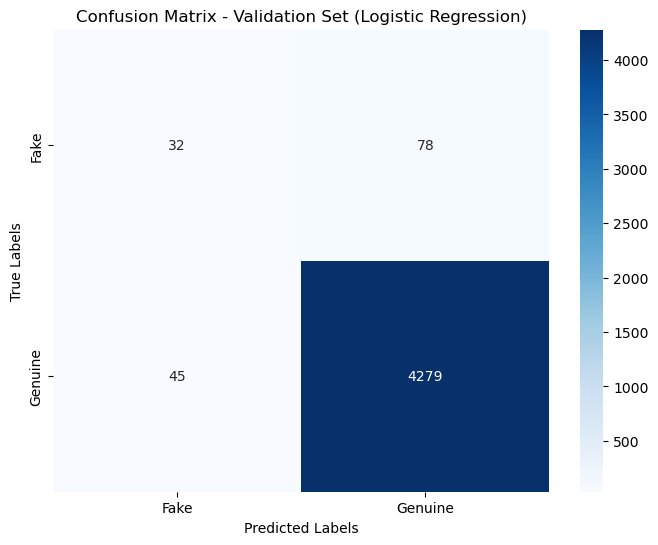

In [49]:
# Assuming you have trained a logistic regression model and made predictions on the validation set
y_val_pred = model.predict(X_val)

# Computing the confusion matrix
conf_matrix_val_logistic = confusion_matrix(y_val, y_val_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Genuine'], yticklabels=['Fake', 'Genuine'])
plt.title('Confusion Matrix - Validation Set (Logistic Regression)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### With Hyperparameter tuning

In [50]:
# Defining hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Creating logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Performing grid search with cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring=make_scorer(accuracy_score))
grid_search.fit(X_train, y_train)

# Getting best hyperparameters
best_params = grid_search.best_params_

# Initializing the logistic regression model with the best hyperparameters
best_logistic_model = LogisticRegression(random_state=42, **best_params)

# Training the model on the training data
best_logistic_model.fit(X_train, y_train)

# Predicting labels for the validation set
y_val_pred = best_logistic_model.predict(X_val)

# Evaluating the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
classification_report_val = classification_report(y_val, y_val_pred)

# Printing the evaluation metrics
print("Best Hyperparameters:", best_params)
print("Validation Accuracy with Tuned Hyperparameters:", accuracy_val)
print("Classification Report for Validation Set:")
print(classification_report_val)

# Predicting labels for the test set
y_test_pred = best_logistic_model.predict(X_test)

# Evaluating the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

# Printing the evaluation metrics for the test set
print("Test Accuracy with Tuned Hyperparameters:", accuracy_test)
print("Classification Report for Test Set:")
print(classification_report_test)

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Validation Accuracy with Tuned Hyperparameters: 0.9722598105548038
Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.42      0.29      0.34       110
     Genuine       0.98      0.99      0.99      4324

    accuracy                           0.97      4434
   macro avg       0.70      0.64      0.66      4434
weighted avg       0.97      0.97      0.97      4434

Test Accuracy with Tuned Hyperparameters: 0.9749718151071026
Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.63      0.36      0.46       130
     Genuine       0.98      0.99      0.99      4305

    accuracy                           0.97      4435
   macro avg       0.80      0.68      0.72      4435
weighted avg       0.97      0.97      0.97      4435



#### Decision Tree

#### Without Hyperparameter tuning

In [51]:
# Initializing the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Training the Decision Tree model on the training data
dt_model.fit(X_train, y_train)

# Predicting labels for the validation set using Decision Tree
y_val_pred_dt = dt_model.predict(X_val)

# Evaluating the Decision Tree model on the validation set
accuracy_val_dt = accuracy_score(y_val, y_val_pred_dt)
classification_report_val_dt = classification_report(y_val, y_val_pred_dt)

# Printing the evaluation metrics for the Decision Tree on the validation set
print("Decision Tree Validation Accuracy:", accuracy_val_dt)
print("Decision Tree Classification Report for Validation Set:")
print(classification_report_val_dt)

# Predicting labels for the test set using Decision Tree
y_test_pred_dt = dt_model.predict(X_test)

# Evaluating the Decision Tree model on the test set
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)
classification_report_test_dt = classification_report(y_test, y_test_pred_dt)

# Printing the evaluation metrics for the Decision Tree on the test set
print("Decision Tree Test Accuracy:", accuracy_test_dt)
print("Decision Tree Classification Report for Test Set:")
print(classification_report_test_dt)

Decision Tree Validation Accuracy: 0.9715832205683356
Decision Tree Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.44      0.53      0.48       110
     Genuine       0.99      0.98      0.99      4324

    accuracy                           0.97      4434
   macro avg       0.71      0.76      0.73      4434
weighted avg       0.97      0.97      0.97      4434

Decision Tree Test Accuracy: 0.9720405862457723
Decision Tree Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.52      0.56      0.54       130
     Genuine       0.99      0.98      0.99      4305

    accuracy                           0.97      4435
   macro avg       0.75      0.77      0.76      4435
weighted avg       0.97      0.97      0.97      4435



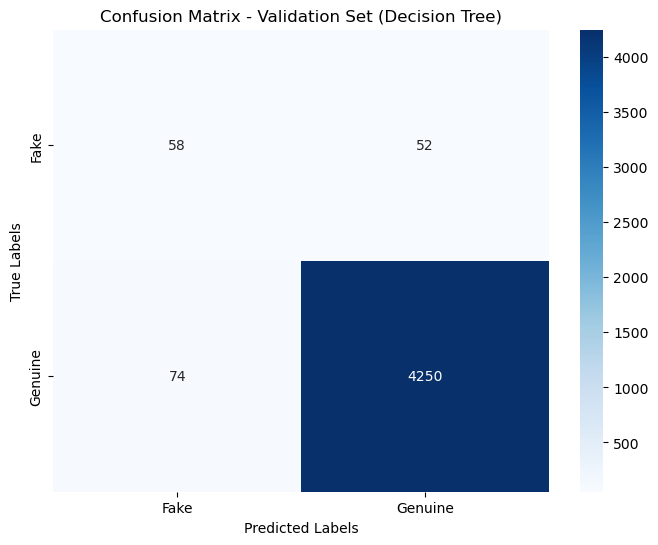

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initializing the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Training the Decision Tree model on the training data
dt_model.fit(X_train, y_train)

# Predicting labels for the validation set using Decision Tree
y_val_pred_dt = dt_model.predict(X_val)

# Computing the confusion matrix for the validation set
conf_matrix_val_dt = confusion_matrix(y_val, y_val_pred_dt)

# Plotting the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Genuine'], yticklabels=['Fake', 'Genuine'])
plt.title('Confusion Matrix - Validation Set (Decision Tree)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### With Hyperparameter tuning

In [53]:
# Defining hyperparameter grid for Decision Tree
param_grid_dt = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Creating Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Performing grid search with cross-validation
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring=make_scorer(accuracy_score))
grid_search_dt.fit(X_train, y_train)

# Getting best hyperparameters
best_params_dt = grid_search_dt.best_params_

# Initializing the Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(random_state=42, **best_params_dt)

# Training the model on the training data
best_dt_model.fit(X_train, y_train)

# Predicting labels for the validation set
y_val_pred_dt_tuned = best_dt_model.predict(X_val)

# Evaluating the model on the validation set
accuracy_val_dt_tuned = accuracy_score(y_val, y_val_pred_dt_tuned)
classification_report_val_dt_tuned = classification_report(y_val, y_val_pred_dt_tuned)

# Printing the evaluation metrics
print("Best Hyperparameters for Decision Tree:", best_params_dt)
print("Decision Tree Validation Accuracy with Tuned Hyperparameters:", accuracy_val_dt_tuned)
print("Decision Tree Classification Report for Validation Set:")
print(classification_report_val_dt_tuned)

# Predicting labels for the test set
y_test_pred_dt_tuned = best_dt_model.predict(X_test)

# Evaluating the model on the test set
accuracy_test_dt_tuned = accuracy_score(y_test, y_test_pred_dt_tuned)
classification_report_test_dt_tuned = classification_report(y_test, y_test_pred_dt_tuned)

# Printing the evaluation metrics for the test set
print("Decision Tree Test Accuracy with Tuned Hyperparameters:", accuracy_test_dt_tuned)
print("Decision Tree Classification Report for Test Set:")
print(classification_report_test_dt_tuned)

Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Validation Accuracy with Tuned Hyperparameters: 0.9722598105548038
Decision Tree Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.45      0.50      0.47       110
     Genuine       0.99      0.98      0.99      4324

    accuracy                           0.97      4434
   macro avg       0.72      0.74      0.73      4434
weighted avg       0.97      0.97      0.97      4434

Decision Tree Test Accuracy with Tuned Hyperparameters: 0.9715896279594137
Decision Tree Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.52      0.52      0.52       130
     Genuine       0.99      0.99      0.99      4305

    accuracy                           0.97      4435
   macro avg       0.75      0.75      0.75      4435
weighted

## Random Forest

#### Without Hyperparameter tuning

In [54]:
# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Training the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Predicting labels for the validation set using Random Forest
y_val_pred_rf = rf_model.predict(X_val)

# Evaluating the Random Forest model on the validation set
accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
classification_report_val_rf = classification_report(y_val, y_val_pred_rf)

# Printing the evaluation metrics for the Random Forest on the validation set
print("Random Forest Validation Accuracy:", accuracy_val_rf)
print("Random Forest Classification Report for Validation Set:")
print(classification_report_val_rf)

# Predicting labels for the test set using Random Forest
y_test_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model on the test set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
classification_report_test_rf = classification_report(y_test, y_test_pred_rf)

# Printing the evaluation metrics for the Random Forest on the test set
print("Random Forest Test Accuracy:", accuracy_test_rf)
print("Random Forest Classification Report for Test Set:")
print(classification_report_test_rf)

Random Forest Validation Accuracy: 0.9733874605322508
Random Forest Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.47      0.57      0.52       110
     Genuine       0.99      0.98      0.99      4324

    accuracy                           0.97      4434
   macro avg       0.73      0.78      0.75      4434
weighted avg       0.98      0.97      0.97      4434

Random Forest Test Accuracy: 0.97271702367531
Random Forest Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.53      0.61      0.57       130
     Genuine       0.99      0.98      0.99      4305

    accuracy                           0.97      4435
   macro avg       0.76      0.80      0.78      4435
weighted avg       0.97      0.97      0.97      4435



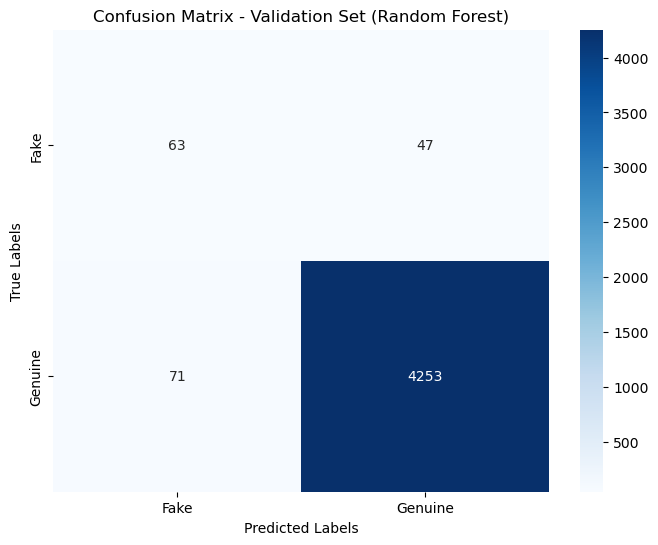

In [55]:
# Assuming you have trained a Random Forest model and made predictions on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Compute the confusion matrix
conf_matrix_val_rf = confusion_matrix(y_val, y_val_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Genuine'], yticklabels=['Fake', 'Genuine'])
plt.title('Confusion Matrix - Validation Set (Random Forest)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### With Hyperparameter tuning

In [56]:
# Defining hyperparameter grid
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Creating Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Performing grid search with cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring=make_scorer(accuracy_score))
grid_search_rf.fit(X_train, y_train)

# Getting best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Initializing the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params_rf)

# Training the model on the training data
best_rf_model.fit(X_train, y_train)

# Predicting labels for the validation set
y_val_pred_rf_tuned = best_rf_model.predict(X_val)

# Evaluating the model on the validation set
accuracy_val_rf_tuned = accuracy_score(y_val, y_val_pred_rf_tuned)
classification_report_val_rf_tuned = classification_report(y_val, y_val_pred_rf_tuned)

# Printing the evaluation metrics
print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Random Forest Validation Accuracy with Tuned Hyperparameters:", accuracy_val_rf_tuned)
print("Random Forest Classification Report for Validation Set:")
print(classification_report_val_rf_tuned)

# Predicting labels for the test set
y_test_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluating the model on the test set
accuracy_test_rf_tuned = accuracy_score(y_test, y_test_pred_rf_tuned)
classification_report_test_rf_tuned = classification_report(y_test, y_test_pred_rf_tuned)

# Printing the evaluation metrics for the test set
print("Random Forest Test Accuracy with Tuned Hyperparameters:", accuracy_test_rf_tuned)
print("Random Forest Classification Report for Test Set:")
print(classification_report_test_rf_tuned)


Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Validation Accuracy with Tuned Hyperparameters: 0.9713576905728462
Random Forest Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.44      0.53      0.48       110
     Genuine       0.99      0.98      0.99      4324

    accuracy                           0.97      4434
   macro avg       0.71      0.75      0.73      4434
weighted avg       0.97      0.97      0.97      4434

Random Forest Test Accuracy with Tuned Hyperparameters: 0.9742953776775648
Random Forest Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.56      0.62      0.58       130
     Genuine       0.99      0.99      0.99      4305

    accuracy                           0.97      4435
   macro avg       0.77      0.80      0.79      4435
weighted av

## Support Vector Machine 

#### Without Hyperparameter tuning

In [57]:
# Initializing the Support Vector Machine model
svm_model = SVC(random_state=42)

# Training the Support Vector Machine model on the training data
svm_model.fit(X_train, y_train)

# Predicting labels for the validation set using SVM
y_val_pred_svm = svm_model.predict(X_val)

# Evaluating the SVM model on the validation set
accuracy_val_svm = accuracy_score(y_val, y_val_pred_svm)
classification_report_val_svm = classification_report(y_val, y_val_pred_svm)

# Printing the evaluation metrics for the SVM on the validation set
print("Support Vector Machine Validation Accuracy:", accuracy_val_svm)
print("Support Vector Machine Classification Report for Validation Set:")
print(classification_report_val_svm)

# Predicting labels for the test set using SVM
y_test_pred_svm = svm_model.predict(X_test)

# Evaluating the SVM model on the test set
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
classification_report_test_svm = classification_report(y_test, y_test_pred_svm)

# Printing the evaluation metrics for the SVM on the test set
print("Support Vector Machine Test Accuracy:", accuracy_test_svm)
print("Support Vector Machine Classification Report for Test Set:")
print(classification_report_test_svm)

Support Vector Machine Validation Accuracy: 0.9742895805142084
Support Vector Machine Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.49      0.63      0.55       110
     Genuine       0.99      0.98      0.99      4324

    accuracy                           0.97      4434
   macro avg       0.74      0.81      0.77      4434
weighted avg       0.98      0.97      0.98      4434

Support Vector Machine Test Accuracy: 0.9745208568207441
Support Vector Machine Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.56      0.58      0.57       130
     Genuine       0.99      0.99      0.99      4305

    accuracy                           0.97      4435
   macro avg       0.78      0.79      0.78      4435
weighted avg       0.97      0.97      0.97      4435



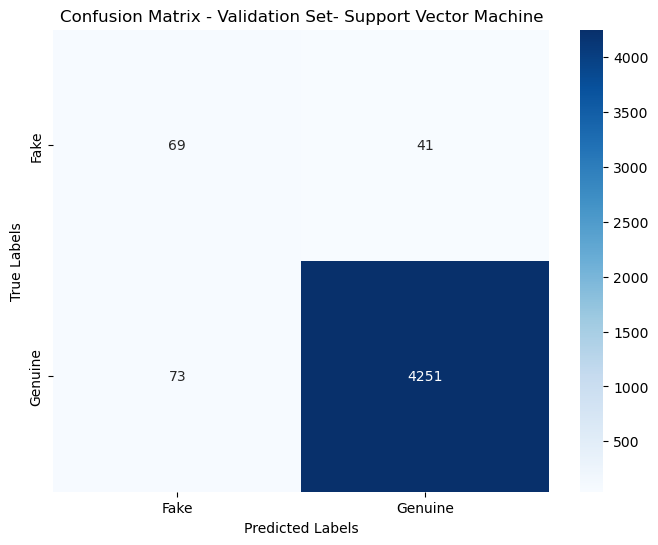

In [58]:
### With Hyperparameter tuningfrom sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Genuine'], yticklabels=['Fake', 'Genuine'])
plt.title('Confusion Matrix - Validation Set- Support Vector Machine')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#### With Hyperparameter tuning

In [ ]:
# Defining the parameter grid for Grid Search
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto', 0.1, 1]}

# Initializing the Support Vector Machine model
svm_model = SVC(random_state=42)

# Initializing Grid Search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy')

# Training the Support Vector Machine model on the training data with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Getting the best parameters from the Grid Search
best_params = grid_search.best_params_

# Using the best parameters to initialize the final SVM model
final_svm_model = SVC(**best_params, random_state=42)

# Training the final SVM model on the training data
final_svm_model.fit(X_train, y_train)

# Predicting labels for the validation set using the final SVM model
y_val_pred_svm = final_svm_model.predict(X_val)

# Evaluating the final SVM model on the validation set
accuracy_val_svm = accuracy_score(y_val, y_val_pred_svm)
classification_report_val_svm = classification_report(y_val, y_val_pred_svm)

# Printing the evaluation metrics for the final SVM on the validation set
print("Support Vector Machine Validation Accuracy:", accuracy_val_svm)
print("Support Vector Machine Classification Report for Validation Set:")
print(classification_report_val_svm)

# Predicting labels for the test set using the final SVM model
y_test_pred_svm = final_svm_model.predict(X_test)

# Evaluating the final SVM model on the test set
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
classification_report_test_svm = classification_report(y_test, y_test_pred_svm)

# Printing the evaluation metrics for the final SVM on the test set
print("Support Vector Machine Test Accuracy:", accuracy_test_svm)
print("Support Vector Machine Classification Report for Test Set:")
print(classification_report_test_svm)


### Testing the Model 

In [ ]:
from textblob import TextBlob

# Assuming you have a new review stored in a variable called 'new_review_text'
new_review_text = "product is good and value for money.But, the packaging was worst ever received from Amazon. "

# Define a function to calculate sentiment score using TextBlob
def calculate_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Calculate sentiment score for the new review
new_review_sentiment_score = calculate_sentiment_score(new_review_text)

# Define thresholds for sentiment categories
good_threshold = 0.7
bad_threshold = -0.5  # Set a specific value for the "Bad" threshold

# Categorize sentiment based on thresholds
if new_review_sentiment_score > good_threshold:
    prediction = "Good 😊"
elif new_review_sentiment_score < bad_threshold:
    prediction = "Bad ☹️"
else:
    prediction = "Moderate 🙂"

# Print the prediction
print(f"The sentiment prediction for the new review is: {prediction}")
